## Exploratory Data Analysis

### Objective

This notebook performs exploratory data analysis of the FER2013 dataset.
The goal is to understand the structure of the data, class distribution, and
visual properties of facial expressions before defining any models.

In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Dataset Structure

The dataset is organized into train and test directories. Each directory
contains subfolders corresponding to emotion classes. Paths are defined
explicitly to ensure reproducibility.

In [2]:
DATA_DIR = Path("../data")
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"

assert TRAIN_DIR.exists()
assert TEST_DIR.exists()

## Class Discovery

Class names are inferred directly from the directory structure instead of being
hardcoded. This mirrors how the data loader will operate in the training
pipeline.

In [3]:
train_classes = sorted(
    d.name for d in TRAIN_DIR.iterdir() if d.is_dir()
)
test_classes = sorted(
    d.name for d in TEST_DIR.iterdir() if d.is_dir()
)

train_classes, test_classes

(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

## Image Count per Class

Before converting the task into a binary classification problem, we examine
the original multi-class distribution to identify potential imbalance.

In [4]:
def count_images_per_class(base_dir):
    return {
        d.name: len(list(d.glob("*")))
        for d in base_dir.iterdir()
        if d.is_dir()
    }

train_counts = count_images_per_class(TRAIN_DIR)
test_counts = count_images_per_class(TEST_DIR)

train_counts, test_counts

({'happy': 7215,
  'sad': 4830,
  'fear': 4097,
  'surprise': 3171,
  'neutral': 4965,
  'angry': 3995,
  'disgust': 436},
 {'happy': 1774,
  'sad': 1247,
  'fear': 1024,
  'surprise': 831,
  'neutral': 1233,
  'angry': 958,
  'disgust': 111})

## Binary Class Definition

The task is reformulated as binary classification:
happy expressions form the positive class, while all other expressions are
grouped into a single negative class.

In [5]:
POSITIVE_CLASS = "happy"

def binary_split(counts):
    happy = counts.get(POSITIVE_CLASS, 0)
    non_happy = sum(v for k, v in counts.items() if k != POSITIVE_CLASS)
    return happy, non_happy

train_happy, train_non_happy = binary_split(train_counts)
train_happy, train_non_happy

(7215, 21494)

## Class Balance Visualization

The binary class distribution in the training set is visualized to assess
the degree of imbalance.

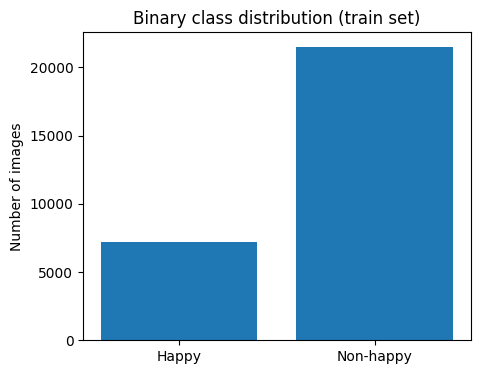

In [6]:
plt.figure(figsize=(5, 4))
plt.bar(["Happy", "Non-happy"], [train_happy, train_non_happy])
plt.ylabel("Number of images")
plt.title("Binary class distribution (train set)")
plt.show()

## Visual Sanity Check

A small number of images from each class are displayed to verify data quality
and label consistency.

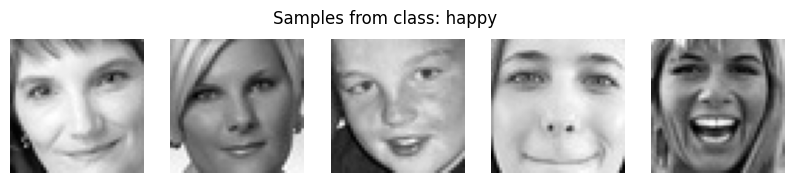

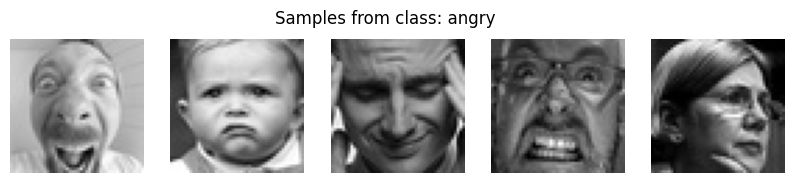

In [7]:
def show_samples(class_name, n=5):
    class_dir = TRAIN_DIR / class_name
    images = list(class_dir.glob("*"))[:n]

    plt.figure(figsize=(10, 2))
    for i, img_path in enumerate(images):
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")

    plt.suptitle(f"Samples from class: {class_name}")
    plt.show()

show_samples("happy")
show_samples(train_classes[0])

## Observations

- The dataset exhibits class imbalance after binarization.
- Happy expressions are visually distinct but sometimes subtle.
- Low resolution limits fine-grained facial detail.
- Label noise is expected due to subjective annotation.